In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [25]:
def closest(lst, K):
      
     lst = np.asarray(lst)
     idx = (np.abs(lst - K)).argmin()
     return lst[idx]
     
def counts_to_irradiance(flame_data, integration_time, k_filepath):
    
    k_data = np.loadtxt(k_filepath,skiprows=1)
    irradiance = np.zeros(flame_data.shape)
    for i in range(len(irradiance[:,0])):
        irradiance[i,0] = flame_data[i,0]
        k_data_closest_index = np.where(k_data[:,0] == closest(k_data[:,0],flame_data[i,0]))[0]
        irradiance[i,1] = flame_data[i,1]*k_data[k_data_closest_index[0],1]/integration_time
        
    return irradiance
    


In [26]:
txt_filelist = os.listdir(os.path.join(os.getcwd(),'Red Sweep Opening'))
int_time = 0.001*0.9
k_filepath = 'flame_to_irradiance_calibrationfile.txt'
spectra_data = None
bg_spectra = np.loadtxt(os.path.join('Red Sweep Opening',txt_filelist[0]), skiprows=1)

for i in range(0,100):
    load_spectra = np.loadtxt(os.path.join('Red Sweep Opening',txt_filelist[i]), skiprows=1)
    actual_txt_spectra = np.zeros(load_spectra.shape)
    actual_txt_spectra [:,0] = load_spectra[:,0]
    actual_txt_spectra [:,1] = load_spectra[:,1] - bg_spectra[:,1]
    actual_irradiance_spectra = counts_to_irradiance(actual_txt_spectra,int_time,k_filepath)
    if i == 0:
        spectra_data = actual_irradiance_spectra
    else:
        spectra_data = np.dstack((spectra_data, actual_irradiance_spectra))

cut_wl_relation = np.loadtxt(os.path.join('Red Sweep Opening','Red Sweep Opneing - cutting wavelenght relation.txt'), skiprows=1)

In [52]:
#Now load the measurement data
measurement_data = np.loadtxt('MCV.210602.OT2..Red Sweep Opening.txt', skiprows=1)

Jsc_divWL = -1*measurement_data[:,2]      #in mA/cm^2
spectra_matrix = None
for i in range(len(Jsc_divWL)):
    actual_cut_wl = measurement_data[i,0]
    actual_spectra_data_index_cutwl = np.where(cut_wl_relation[:,2] == closest(cut_wl_relation[:,2], actual_cut_wl))[0]
    actual_cut_wl_spectra = np.transpose(spectra_data[:,1,actual_spectra_data_index_cutwl[0]])
    if i == 0:
        spectra_matrix = actual_cut_wl_spectra
    else:
        spectra_matrix = np.vstack((spectra_matrix, actual_cut_wl_spectra))

for i in range(len(spectra_matrix[:,0])):
    for j in range(len(spectra_matrix[0,:])):
        if abs(spectra_matrix[i,j])<=0.001:
            spectra_matrix[i,j] = 0





In [53]:
wl_interval = 1
c_matrix_wl = range(360, 760, 1)
c_matrix = np.zeros((len(measurement_data[:,0]),len(c_matrix_wl)))
for i in range(len(c_matrix[:,0])):
    spectra_interp = interpolate.interp1d(spectra_data[:,0,0], spectra_matrix[i,:])
    for j in range(len(c_matrix[0,:])):
        actual_wl = c_matrix_wl[j]
        c_matrix[i,j] = 100*spectra_interp(actual_wl)*actual_wl*wl_interval/1240
        



In [54]:
print(c_matrix[:,20])


[0.         0.         0.         0.         0.         0.02469689
 0.02813234 0.02813691 0.02651055 0.02840645 0.0309008  0.03716763
 0.03788135 0.03126628 0.02954398 0.03301141 0.03115664 0.04222667
 0.04256866 0.03140333 0.03935294 0.04421169 0.04215207 0.04237977
 0.04618013 0.04855845 0.05482555 0.04950847 0.0525881  0.05271661
 0.05070198 0.05314779 0.05183587 0.05442998 0.05482066 0.06118446
 0.05613223 0.05742856 0.06106352 0.09176951 0.11609678]


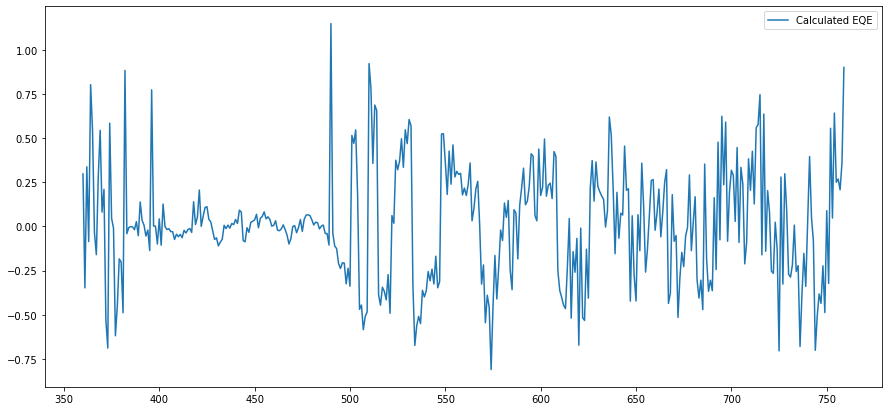

In [55]:
#Here we do the calculations with the linear equations system


EQE_linearsolution, residuals, rank, s = np.linalg.lstsq(c_matrix, Jsc_divWL, rcond=None)
fig, ax = plt.subplots(figsize=(15,7))

#print(EQE_linearsolution)
#ax.plot(sf.Extract_Column(Active_layer_1.EQE_curve, 0), 1*np.array(sf.Extract_Column(Active_layer_1.EQE_curve, 1)), label = 'Real EQE')
ax.plot(c_matrix_wl, EQE_linearsolution, label = 'Calculated EQE')
#ax.plot(spectra_data[:,0,20],spectra_data[:,1,99])
ax.legend()
#plt.ylim(0,5)
plt.figsize=(8, 6)



In [56]:
print(Solar_data_nparray)

NameError: name 'Solar_data_nparray' is not defined